# Pyber Challenge (Module 5)

### 4.3 Loading and Reading CSV files

In [177]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (from the Resources folder)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [178]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [238]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [240]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [185]:
# For this deliverable, I practiced the NumPy and stats module from SciPy.

# Quote from Module 5.4.1 (Summary Statistics for Number of Rides by City Type):

# "An optional approach to calculating the mean, median, and mode of a DataFrame or 
# Series is to use the NumPy and SciPy statistics modules. We introduce these methods 
# because there might come a time when you're working in the Python interpreter or VS Code environment 
# instead of the Jupyter Notebook environment."

# "Whether you are using the use the Python interpreter, VS Code, or Jupyter Notebook environment, 
# we will need to import the NumPy and SciPy statistics modules."

In [179]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [180]:
# Deliverable 1 Step 1: Get the total rides for each city type.
# Use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the count() method to the "ride_id" column.
total_rides = pyber_data_df.groupby(['type']).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [182]:
urban_rides = total_rides["Urban"]
suburban_rides = total_rides["Suburban"]
rural_rides = total_rides["Rural"]

print(f"There are a total of {urban_rides} rides for urban cities.")
print(f"There are a total of {suburban_rides} rides for suburban cities.")
print(f"There are a total of {rural_rides} rides for rural cities.")

There are a total of 1625 rides for urban cities.
There are a total of 625 rides for suburban cities.
There are a total of 125 rides for rural cities.


In [199]:
# Double checking amounts in cells below.

In [223]:
urban_rides.sum()

1625

In [224]:
suburban_rides.sum()

625

In [225]:
rural_rides.sum()

125

In [241]:
urban_rides + suburban_rides + rural_rides

2375

In [226]:
# ---Intentionally left blank to separate Deliverable steps---

In [227]:
# Deliverable 1 Step 2: Get the total drivers for each city type.
# Use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "driver_count" column.
total_drivers = city_data_df.groupby(['type']).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [228]:
urban_drivers = total_drivers["Urban"]
suburban_drivers = total_drivers["Suburban"]
rural_drivers = total_drivers["Rural"]

print(f"There are a total of {urban_drivers} drivers for urban cities.")
print(f"There are a total of {suburban_drivers} drivers for suburban cities.")
print(f"There are a total of {rural_drivers} drivers for rural cities.")

There are a total of 2405 drivers for urban cities.
There are a total of 490 drivers for suburban cities.
There are a total of 78 drivers for rural cities.


In [195]:
# Double checking amounts in cells below.

In [229]:
urban_drivers.sum()

2405

In [230]:
suburban_drivers.sum()

490

In [231]:
rural_drivers.sum()

78

In [232]:
# ---Intentionally left blank to separate Deliverable steps---

In [186]:
# Deliverable 1 Step 3: Get the total amount of fares for each city type.
# Use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "fare" column.
total_fares = pyber_data_df.groupby(['type']).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [188]:
total_urban_fares = total_fares["Urban"]
total_suburban_fares = total_fares["Suburban"]
total_rural_fares = total_fares["Rural"]

print(f"There are a total of {total_urban_fares} fares for urban cities.")
print(f"There are a total of {total_suburban_fares} fares for suburban cities.")
print(f"There are a total of {total_rural_fares} fares for rural cities.")

There are a total of 39854.38 fares for urban cities.
There are a total of 19356.33 fares for suburban cities.
There are a total of 4327.93 fares for rural cities.


In [203]:
# Double checking amounts in cells below.

In [233]:
total_urban_fares.sum()

39854.38

In [234]:
total_suburban_fares.sum()

19356.33

In [235]:
total_rural_fares.sum()

4327.93

In [236]:
# ---Intentionally left blank to separate Deliverable steps---

In [214]:
# Deliverable 1 Step 4: Get the average fare per ride for each city type [by dividing the sum of all fares by the total rides].

average_ride_fare = total_fares / total_rides
average_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [218]:
urban_average_fare = average_ride_fare["Urban"]
suburban_average_fare = average_ride_fare["Suburban"]
rural_average_fare = average_ride_fare["Rural"]

print(f"The average ride fare for urban cities is: ${urban_average_fare:.2f}.")
print(f"The average ride fare for suburban cities is: ${suburban_average_fare:.2f}.")
print(f"The average ride fare for rural cities is: ${rural_average_fare:.2f}.")

The average ride fare for urban cities is: $24.53.
The average ride fare for suburban cities is: $30.97.
The average ride fare for rural cities is: $34.62.


In [237]:
# In this cell: practicing NumPy and stats module from SciPy
# (Already imported NumPy and stats module from SciPy in previous cell above.)

# Deliverable 1 Step 4: Get the average fare per ride for each city type. 

# Create DataFrames for each city type.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the fares for each city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Calculate the average fare ride per city type.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [209]:
# Deliverable 1 Step 5: Get the average fare per driver for each city type [by dividing the sum of all the fares bt the total drivers].

average_driver_fare = total_fares / total_drivers
average_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [ ]:
# Double checking in cell below.

In [210]:
average_driver_fare_check = pyber_data_df.groupby(['type']).sum()["fare"] / city_data_df.groupby(['type']).sum()["driver_count"]
average_driver_fare_check

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [247]:
# Deliverable 1 Step 6: Create a PyBer summary DataFrame [with all the gathered data from Steps 1-5].
# Use the following column names: Total Rides, Total Drivers, Total Fares, Average Fare per Ride, Average Fare per Driver.

pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Average Fare per Ride" : average_ride_fare,
    "Average Fare per Driver" : average_driver_fare})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [258]:
# Deliverable 1 Step 7: Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,"1,625",2405,39854.38,24.525772,16.571468


In [274]:
# Deliverable 1 Step 8: Format the columns [to have commas and/or to show currency].

pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Average Fare per Ride" : average_ride_fare,
    "Average Fare per Driver" : average_driver_fare})

# Format the "Total Rides" to have the comma for a thousands separator.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

# Format the "Total Drivers" to have the comma for a thousands separator.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

# Format the "Total Fares" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

# Format the "Average Fare per Ride" to have a decimal separator and a "$".
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

# Format the "Average Fare per Driver" to have a decimal separator and a "$".
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df



# I used the code below that is commented out (from my repository: School_District_Analysis; file: py_CitySchools_Challenge.ipynb)
# as a reference formatting pyber_summery_df.



# Format the "Total Students" to have the comma for a thousands separator.
# district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)

# Format the "Total Budget" to have the comma for a thousands separator, a decimal separator and a "$".
# district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)

# Format the columns.
# district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)
# district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)
# district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.1f}".format)
# district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.1f}".format)
# district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.1f}".format)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [285]:
# Deliverable 2 Step 1: Read the merged DataFrame.

In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [296]:
# Deliverable 2 Step 2: Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.

# Create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns
# of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date
fare_receipt_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fare_receipt_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [297]:
# Deliverable 2 Step 3: Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

# df = df.reset_index() <---for this Deliverable (2), I noticed that the DataFrame in the code is "df"; 
# I named my DataFrame "fare_receipt_df" so it's more descriptive.

fare_receipt_df = fare_receipt_df.reset_index()
fare_receipt_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [298]:
# ---Intentionally left blank to separate Deliverable steps---

In [314]:
# Deliverable 2 Step 4: Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

# Use the pivot() function to convert the DtaFrame from the previous step
# so that the index is the "date", each column is a city "type", and the values are the "fare."
# Note: in cells where there is no fare to be summoned for that row, the cell will be filled with NaNs.

fare_receipt_df = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')
fare_receipt_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [315]:
# ---Intentionally left blank to separate Deliverable steps---

In [316]:
# Deliverable 2 Step 5: Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_receipt_df = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare').loc["2019-01-01":"2019-04-29"]

fare_receipt_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [323]:
# Deliverable 2 Step 6: Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_receipt_df.index = pd.to_datetime(fare_receipt_df.index)
fare_receipt_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [324]:
# Deliverable 2 Step 7: Check that the datatype for the index is datetime using df.info()

fare_receipt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

In [326]:
# Deliverable 2 Step 8: Create a new Deliverable 2 Step DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_receipt_df = fare_receipt_df.resample('W').sum()
fare_receipt_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [ ]:
# ---Intentionally left blank to separate Deliverable steps---

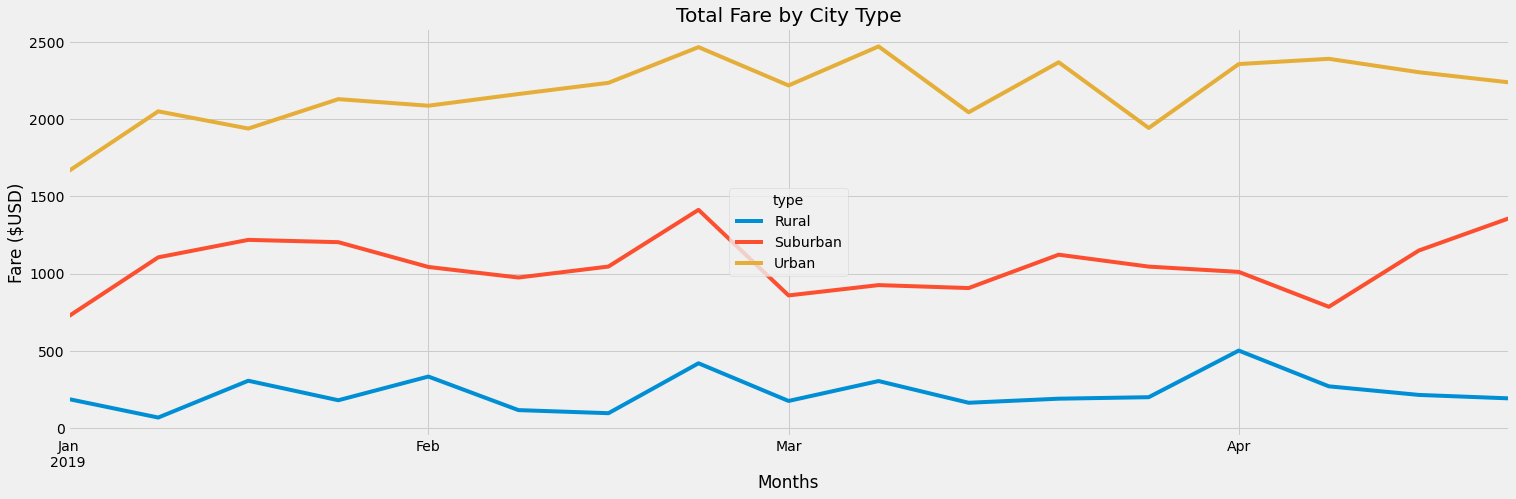

In [344]:
# Deliverable 2 Step 9: Graph the resampled DataFrame from the previous step using the object-oriented interface method
# and the df.plot() method, as well as the Matplotlib "fivethirtyeight" graphy style code snippet provided in the starter code.
# Annotate the x/y axes then use the appropriate code to save the figure as Pyber_fare_summary.png in your "analysis" folder.

fare_receipt_df.plot(figsize = (23, 7))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare by City Type")
plt.xlabel("Months")
plt.ylabel("Fare ($USD)")

# Save Figure.
plt.savefig("Pyber_fare_summary.png")
